In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data=pd.read_csv('Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
(data.head(5))

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
data.drop(columns='User ID',inplace=True)

In [23]:
(data.head(5))

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [24]:
from sklearn.preprocessing import StandardScaler,RobustScaler
data['Gender']=pd.get_dummies(data["Gender"],drop_first=True)#get_dummies

In [30]:
rs=RobustScaler()
sc=StandardScaler()
x=sc.fit_transform(data['EstimatedSalary'].values.reshape(-1,1))
for i in data.columns:
    if i!='Gender':
        data[i]=rs.fit_transform(data[i].values.reshape(-1,1))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
features=data.iloc[:,[0,1,2]]
label=data.iloc[:,3]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.33,random_state=0)
knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

conf_mat= confusion_matrix(y_test,y_pred) 
print("\nConfusion Matrix : \n",conf_mat)

print("\nClassification Report :\n",classification_report(y_test,y_pred))


Confusion Matrix : 
 [[78  6]
 [ 4 44]]

Classification Report :
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        84
         1.0       0.88      0.92      0.90        48

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.93      0.92      0.92       132



In [33]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.107692,-1.133333,0.0
1,1,-0.123077,-1.111111,0.0
2,0,-0.676923,-0.600000,0.0
3,0,-0.615385,-0.288889,0.0
4,1,-1.107692,0.133333,0.0


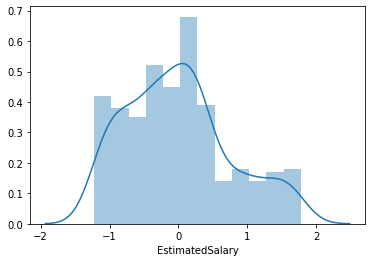

In [34]:
sns.distplot(data['EstimatedSalary']) #robust scaler

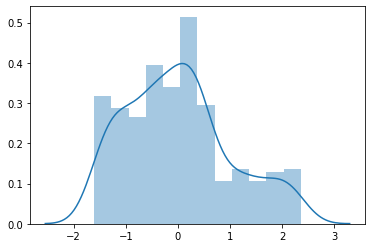

In [35]:
sns.distplot(x) #using standard scaler